#### Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

#### Part 1: Taking a look at the dataset

In [2]:
# The data set consists of 24 columns. 

In [3]:
df_train = pd.read_csv("data/train.csv")
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df_train.shape

(103904, 25)

In [6]:
# doing value counts of the target
df_train['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [7]:
df_train.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

#### Part 2: Cleaning the dataset

In [8]:
# check columns
df_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
#lowercase and snakecase all columns
df_train.columns = df_train.columns.str.lower().str.replace(' ','_')
df_test.columns = df_test.columns.str.lower().str.replace(' ','_')

In [10]:
#drop 'unnamed:0' column
df_train.drop(columns = 'unnamed:_0', inplace = True)
df_test.drop(columns = 'unnamed:_0', inplace = True)

In [11]:
df_train.dtypes

id                                     int64
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
inflight_wifi_service                  int64
departure/arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_de

In [12]:
df_train['gender'].value_counts()

gender
Female    52727
Male      51177
Name: count, dtype: int64

In [13]:
# encode 'Male' as 1 and 'Female' as 2
df_train['gender'] = df_train['gender'].map({'Male':1, 'Female':0})
df_test['gender'] = df_test['gender'].map({'Male':1, 'Female':0})

In [14]:
df_train['customer_type'].value_counts()

customer_type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [15]:
# encode 'Loyal' as 1 and 'unloyal' as 2
df_train['customer_type'] = df_train['customer_type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df_test['customer_type'] = df_test['customer_type'].map({'Loyal Customer':1, 'disloyal Customer':0})

In [16]:
df_train['type_of_travel'].value_counts()

type_of_travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [17]:
# encode 'Business' as 1 and 'Personal' as 2
df_train['type_of_travel'] = df_train['type_of_travel'].map({'Business travel': 1, 'Personal Travel': 0})
df_test['type_of_travel'] = df_test['type_of_travel'].map({'Business travel': 1, 'Personal Travel': 0})

In [18]:
df_train['class'].value_counts()

class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [19]:
#encode 'Business' as 0, 'Eco' as 1, 'Eco Plus' as 2 
df_train['class'] = df_train['class'].map({'Business':0, 'Eco':1, 'Eco Plus':2})
df_test['class'] = df_test['class'].map({'Business':0, 'Eco':1, 'Eco Plus':2})

In [20]:
# check null values

In [21]:
df_train.isnull().sum()

id                                     0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

In [22]:
df_train.dropna(subset =['arrival_delay_in_minutes'], inplace = True)
df_test.dropna(subset =['arrival_delay_in_minutes'], inplace = True)

In [23]:
df_train.isnull().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [24]:
df_train.to_csv('cleaned_train.csv')

In [25]:
df_test.to_csv('cleaned_test.csv')

#### Part 3: Exploring the Dataset (EDA)

In [26]:
# Pairplot 

/Users/amandajogriffin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


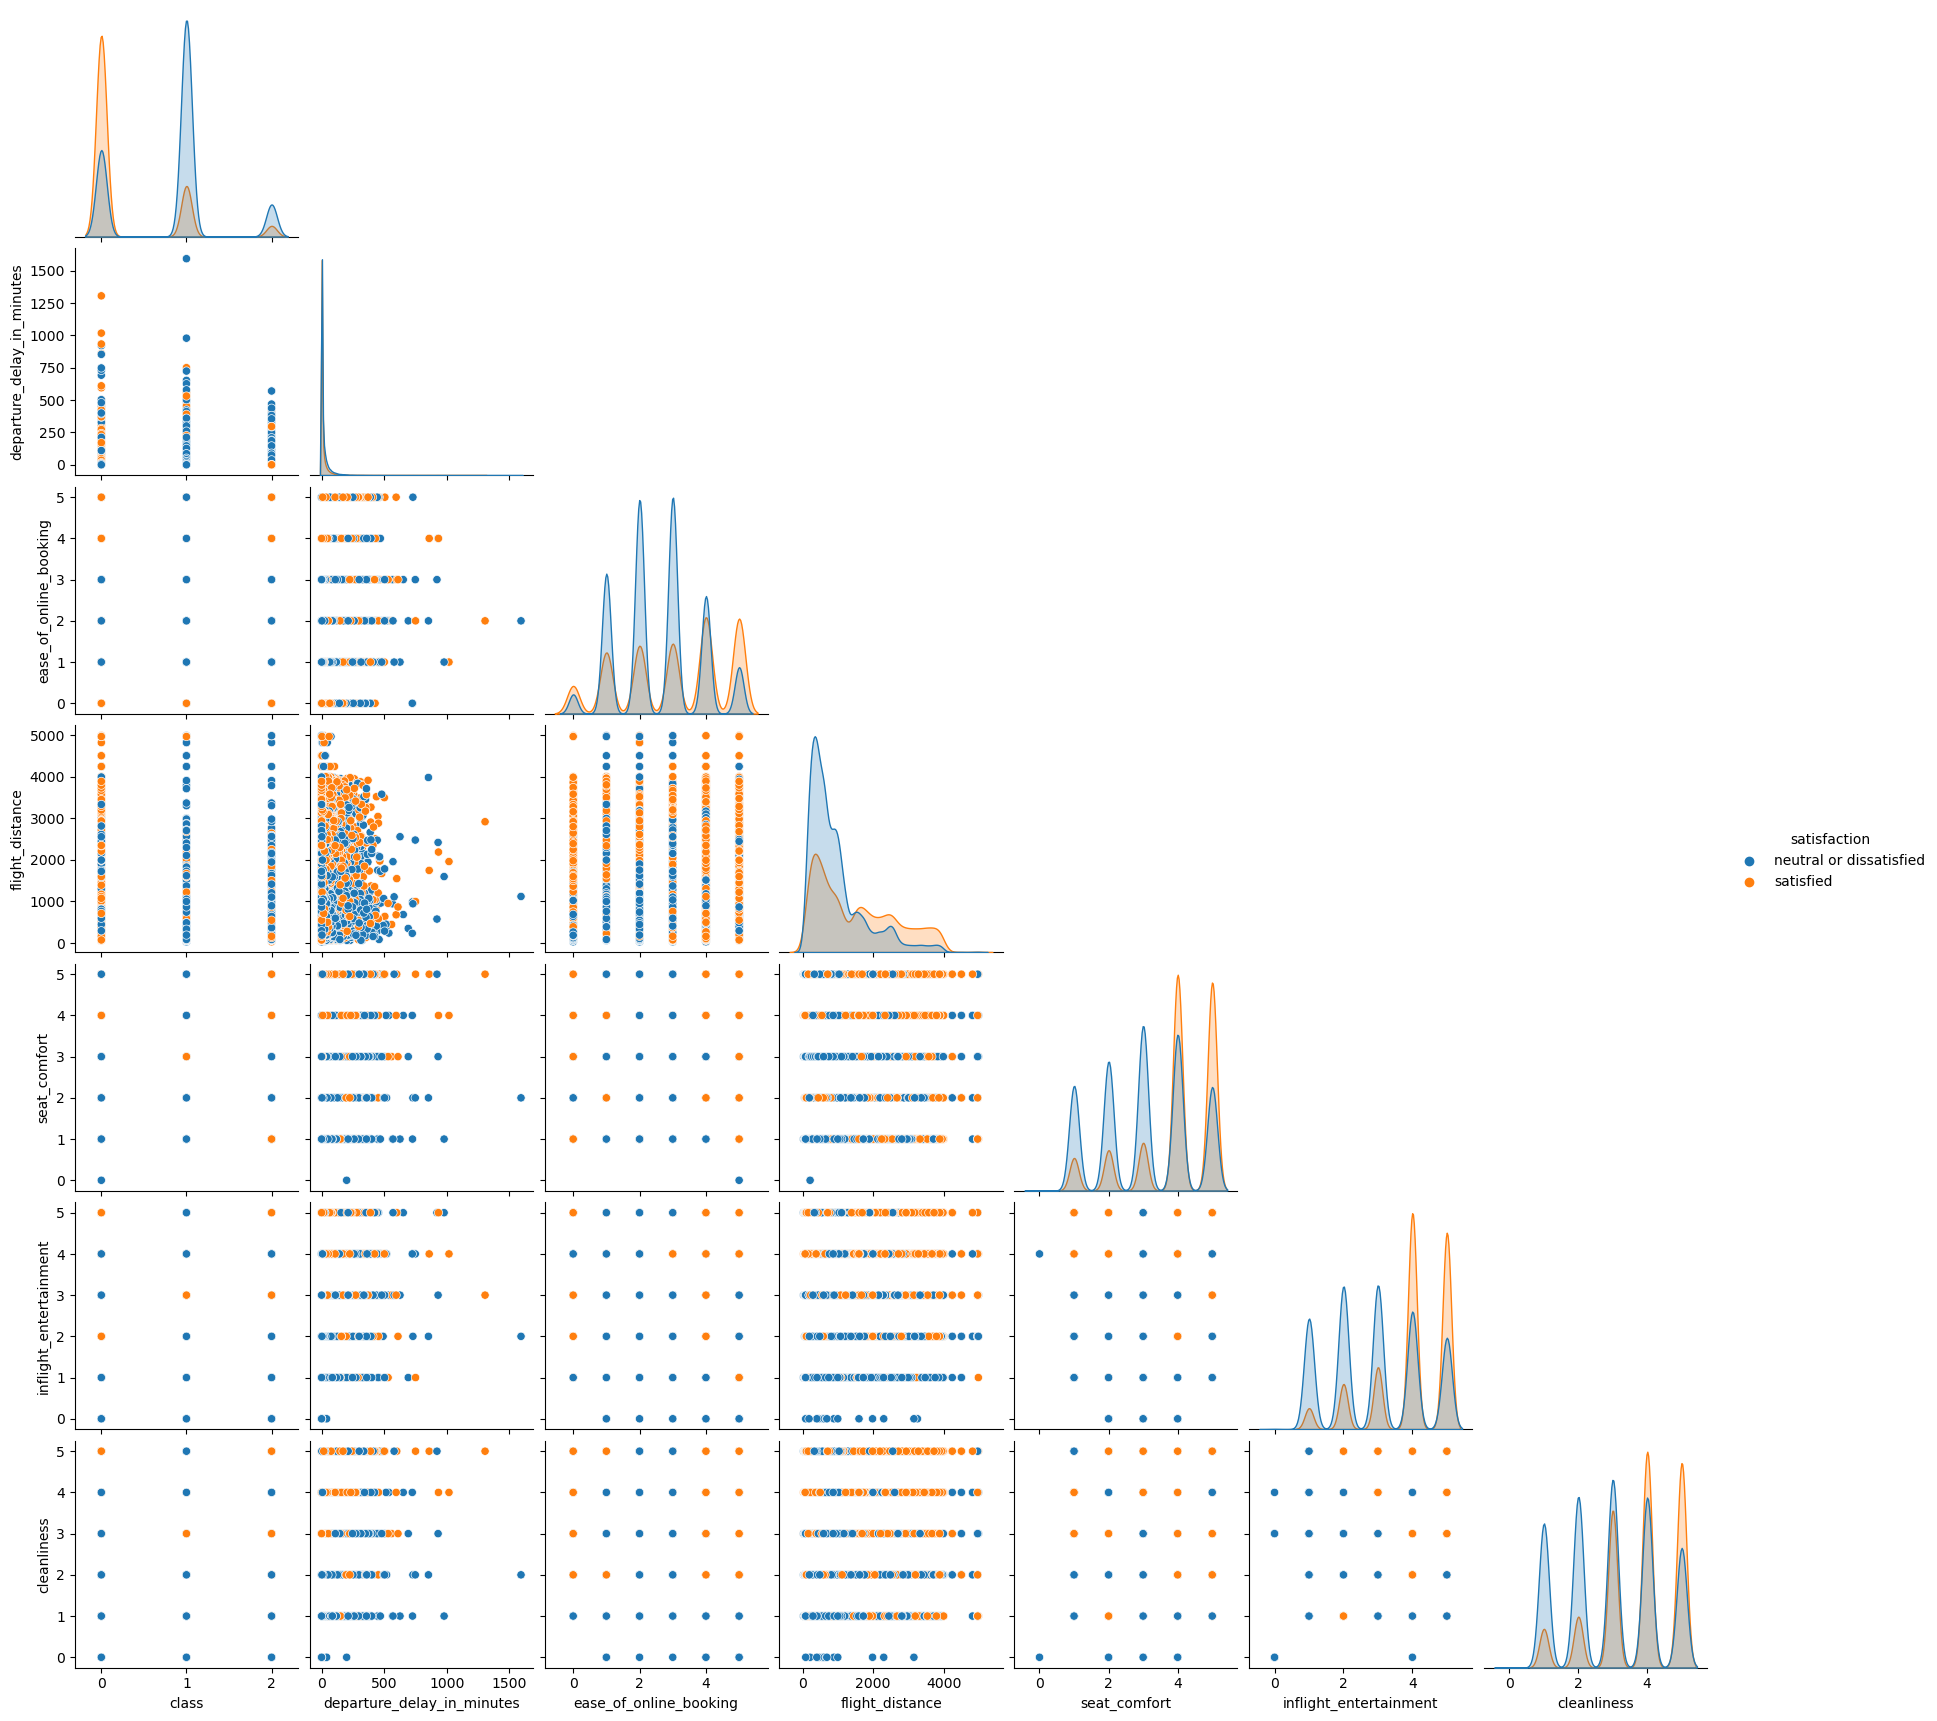

In [27]:
sns.pairplot(data = df_train, 
             x_vars = ['class', 'departure_delay_in_minutes', 'ease_of_online_booking', 'flight_distance', 'seat_comfort', 'inflight_entertainment', 'cleanliness'],
             y_vars = ['class', 'departure_delay_in_minutes', 'ease_of_online_booking', 'flight_distance', 'seat_comfort', 'inflight_entertainment', 'cleanliness'],
             hue = 'satisfaction',
             corner = True);

In [28]:
# barplots

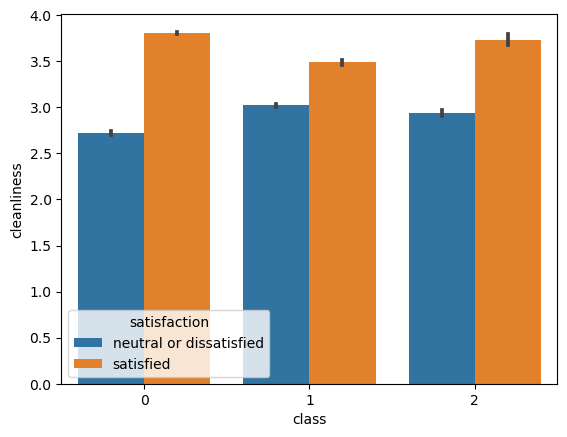

In [30]:
sns.barplot(data = df_train,
                x = 'class',
                y = 'cleanliness',
                hue = 'satisfaction');

In [31]:
# scatterplots

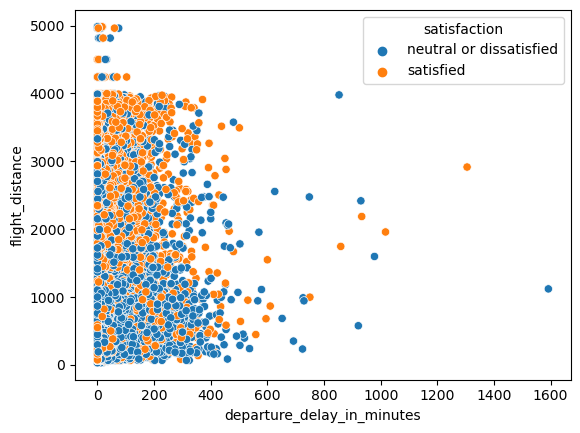

In [32]:
sns.scatterplot(data = df_train,
                x = 'departure_delay_in_minutes',
                y = 'flight_distance',
                hue = 'satisfaction');

In [33]:
# Linecharts

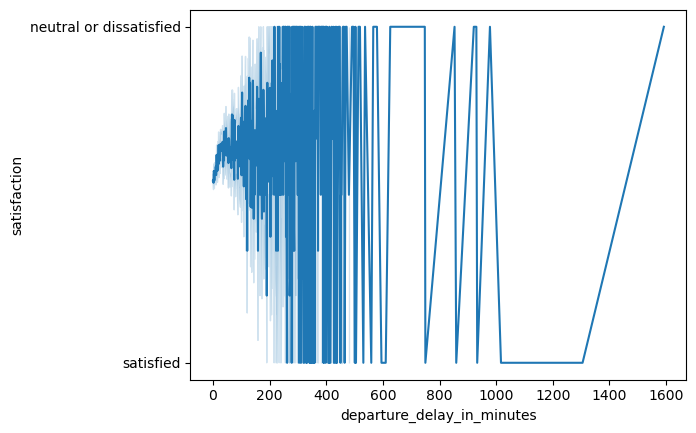

In [34]:
sns.lineplot(data = df_train,
                x = 'departure_delay_in_minutes',
                y = 'satisfaction');

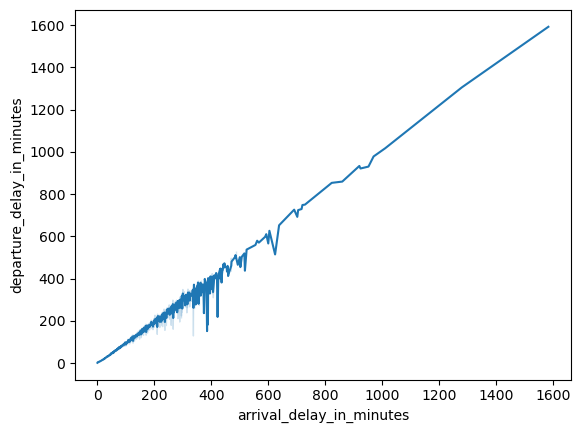

In [35]:
sns.lineplot(data = df_train,
               x = "arrival_delay_in_minutes",
               y = "departure_delay_in_minutes");

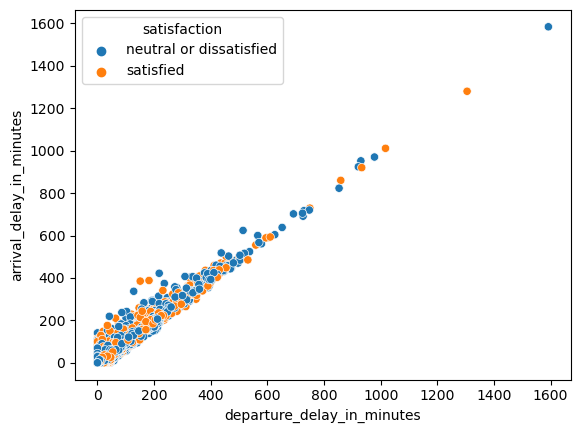

In [36]:
sns.scatterplot(data = df_train,
               x = "departure_delay_in_minutes",
               y = "arrival_delay_in_minutes",
               hue = "satisfaction");

In [ ]:
# Plotly 3D

In [ ]:
import plotly.express as px
px.scatter_3d(df, x='class', y='baggage_handling',z='checkin_service', color = 'satisfaction')

#### Part 4: Modeling

In [ ]:
# baseline

In [ ]:
df['satisfaction'].value_counts(normalize = True)

###### 56.6 % is the baseline 

In [37]:
# create x & y 
X = df_train.drop(columns = 'satisfaction')
y = df_train['satisfaction']

In [38]:
# train, test, split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [40]:
# standardscaler

In [41]:
sc = StandardScaler()

In [42]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [43]:
# Istantiate

In [44]:
knn = KNeighborsClassifier()

In [45]:
# Fit model

In [46]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [47]:
#Accuracy Score

In [48]:
knn.score(X_train_sc, y_train)

0.9471523264045305

In [49]:
knn.score(X_test_sc,y_test)

0.9262905903702846

In [50]:
# Confusion Matrix

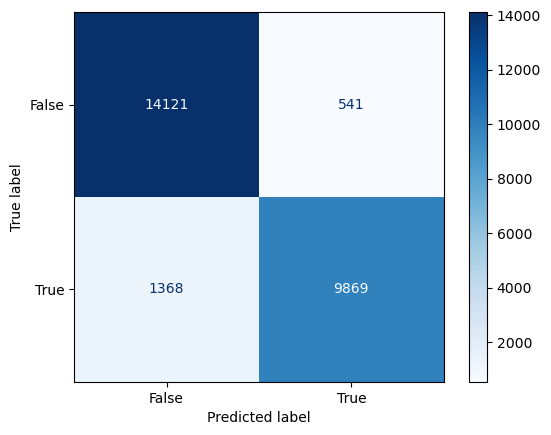

In [51]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues', display_labels = ["False", "True"]);

In [52]:
satisfaction = []

In [53]:
for k in range (3,32,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc,y_train)
    acc_train=knn.score(X_train_sc, y_train)
    acc_test=knn.score(X_test_sc,y_test)
    satisfaction.append({'k':k,'Training Accuracy':acc_train,'Test Accuracy':acc_test})

df_satisfaction = pd.DataFrame(satisfaction)
df_satisfaction

,k,Training Accuracy,Test Accuracy
0,3,0.958196,0.924823
1,5,0.947152,0.926291
2,7,0.943124,0.926599
3,9,0.940331,0.927063
4,11,0.938259,0.927024
5,13,0.936328,0.926484
6,15,0.934874,0.926715
7,17,0.932956,0.926368
8,19,0.932377,0.926098
9,21,0.931437,0.925904


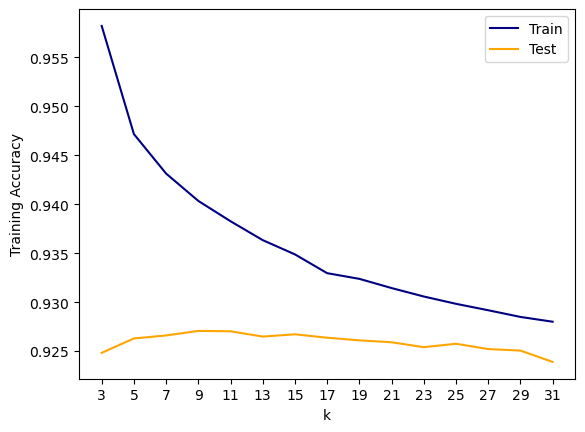

In [54]:
sns.lineplot(data = df_satisfaction, x = 'k', y = 'Training Accuracy', c='navy', label='Train')
sns.lineplot(data = df_satisfaction, x = 'k', y = 'Test Accuracy', c='orange', label='Test')
plt.xticks(range(3, 32, 2));

In [55]:
# Logistic Regression 

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [58]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [59]:
logr.score(X_train_sc, y_train)

0.8763755711435742

In [60]:
logr.score(X_test_sc, y_test)

0.875979767558593

In [61]:
# Forest Classifyer

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [64]:
rf.score(X_train_sc, y_train)

0.9999871291588905

In [65]:
rf.score(X_test_sc, y_test)

0.9630873778910383

###### Random Forest Classifier was the best model that predicted satisfaction rates.

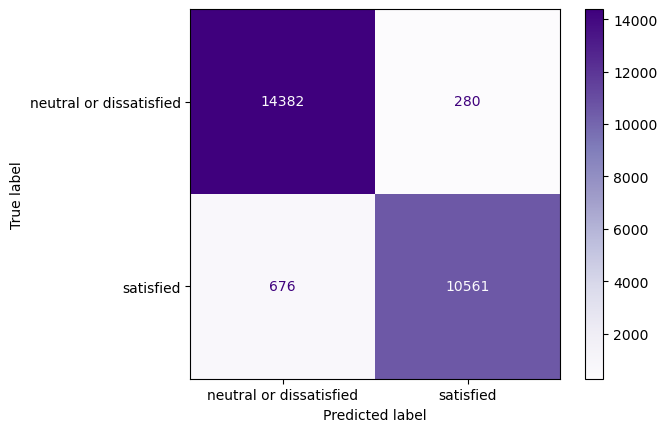

In [66]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');